Import all required libraries and set Jupyter to render any matplotlib charts in line

In [46]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.externals import joblib
from sklearn import metrics
import matplotlib.pyplot as plt

Load in our training data into a pandas dataframe and add the appropriate titles

In [47]:
df_pima = pd.read_csv('C:/Users/nmannheimer/PycharmProjects/Code Projects/Machine Learning/pima-indians-diabetes.csv',
                      names=('Number of times pregnant',
                      'glucose tolerance test',
                      'Diastolic blood pressure mm Hg',
                      'Triceps skin fold thickness',
                      '2-Hour serum insulin mu U/ml',
                      'BMI',
                      'Diabetes pedigree function',
                      'Age',
                      'Class'))

Print the vital information about the dataframe

In [48]:
print df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant          768 non-null int64
glucose tolerance test            768 non-null int64
Diastolic blood pressure mm Hg    768 non-null int64
Triceps skin fold thickness       768 non-null int64
2-Hour serum insulin mu U/ml      768 non-null int64
BMI                               768 non-null float64
Diabetes pedigree function        768 non-null float64
Age                               768 non-null int64
Class                             768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [49]:
df_pima.describe()

,Number of times pregnant,glucose tolerance test,Diastolic blood pressure mm Hg,Triceps skin fold thickness,2-Hour serum insulin mu U/ml,BMI,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Create a training and a test set from our data where 75% of the data is used for training and 25% for test

In [50]:
df_pima['is_train'] = np.random.uniform(0, 1, len(df_pima)) <= 0.75
train = df_pima[df_pima['is_train'] == True]
test = df_pima[df_pima['is_train'] == False]

Seperate our class data for the training and test sets and choose the columns of the dataframe that contain features

In [51]:
trainTargets = np.array(train['Class']).astype(int)
testTargets = np.array(test['Class']).astype(int)
features = df_pima.columns[0:8]

Choose our model (a Random Forest), fit it to our training data, and generate classification predictions for our test data

In [52]:
model = RandomForestClassifier()
predictions = model.fit(train[features], trainTargets).predict(test[features])

Seperate and isolate the true class values and the predictions

In [53]:
results = np.array(predictions)
scoring = np.array(testTargets)

Generate some statistics on the effectiveness of our model

In [54]:
accuracy = metrics.accuracy_score(testTargets, predictions)
print "The model produced {0}% accurate predictions.".format(accuracy*100)
print " "

y_true = testTargets
y_pred = results
print(classification_report(y_true, y_pred))


The model produced 76.213592233% accurate predictions.
 
             precision    recall  f1-score   support

          0       0.78      0.89      0.83       133
          1       0.72      0.53      0.61        73

avg / total       0.76      0.76      0.75       206



Use our decision tree to produce feature importance scores for our features

In [56]:
print 'What is the importance of each feature?'
for feat in zip(features,model.feature_importances_):
    print feat

What is the importance of each feature?
('Number of times pregnant', 0.095858596426995651)
('glucose tolerance test', 0.28595350400676661)
('Diastolic blood pressure mm Hg', 0.093450406304404848)
('Triceps skin fold thickness', 0.059553740138967207)
('2-Hour serum insulin mu U/ml', 0.067736985806583605)
('BMI', 0.13219286132219307)
('Diabetes pedigree function', 0.14312028749088634)
('Age', 0.12213361850320266)


Plot those importance scores

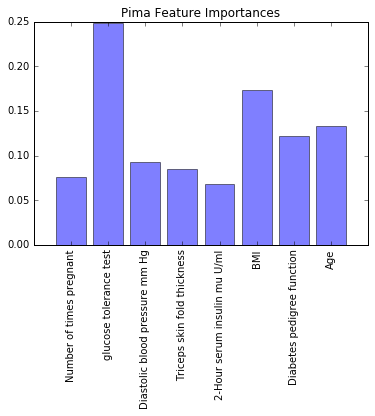

In [42]:
y_pos = np.arange(len(features))
plt.bar(y_pos,model.feature_importances_, align='center',alpha=0.5)
plt.xticks(y_pos, features)
plt.title('Pima Feature Importances')
plt.xticks(rotation=90)
plt.show()


Dump the trained model to a .pkl file which we can re-use later

In [ ]:
joblib.dump(model, 'C:/Users/nmannheimer/Desktop/DataScience/TabPy Training/Completed Models/JupyterPimaForest.pkl')